# Multi Class Classification
Let us apply the algorithm learnt on a multiclass data for online gaming behavior

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.naive_bayes  import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from itertools import cycle

In [ ]:
# Read The dataset
data_df = pd.read_csv('online_gaming_behavior_dataset.csv')
data_df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [ ]:
# Check for the missing Values

data_df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [ ]:
data_df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [ ]:
# Drop the playerID Column
data_df = data_df.drop(columns = ['PlayerID'])

In [ ]:
# Distribution of Target Variable
data_df['EngagementLevel'].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

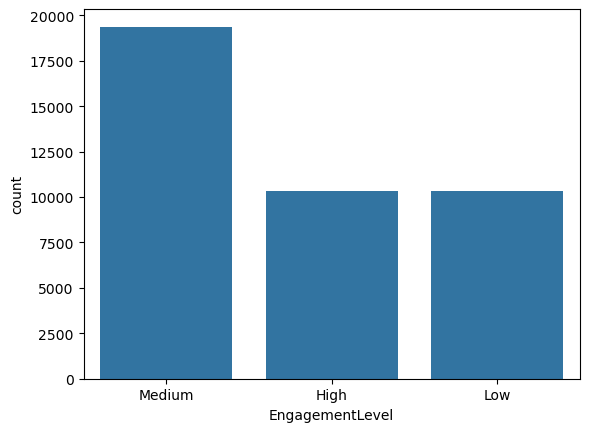

In [ ]:
sns.countplot(x =  'EngagementLevel', data = data_df)
plt.show()

In [ ]:
# Seggregate Features and Target
X = data_df.iloc[:, :-1]
y = data_df.iloc[:,-1]

In [ ]:
print(X['Gender'].nunique())
print(X['Location'].nunique())
print(X['GameGenre'].nunique())
print(X['GameDifficulty'].nunique())
# One hot Encoding would increase the dimensionality an would potentially cause multicollinearity. Hence Apply Label Encoding

2
4
5
3


In [ ]:
cat_col =  X.select_dtypes('object').columns
for col in cat_col:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [ ]:
X.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,43,1,2,4,16.271119,0,2,6,108,79,25
1,29,0,3,4,5.525961,0,2,5,144,11,10
2,22,0,3,3,8.223755,0,0,16,142,35,41
3,35,1,3,0,5.265351,1,0,9,85,57,47
4,33,1,1,0,15.531945,0,2,2,131,95,37


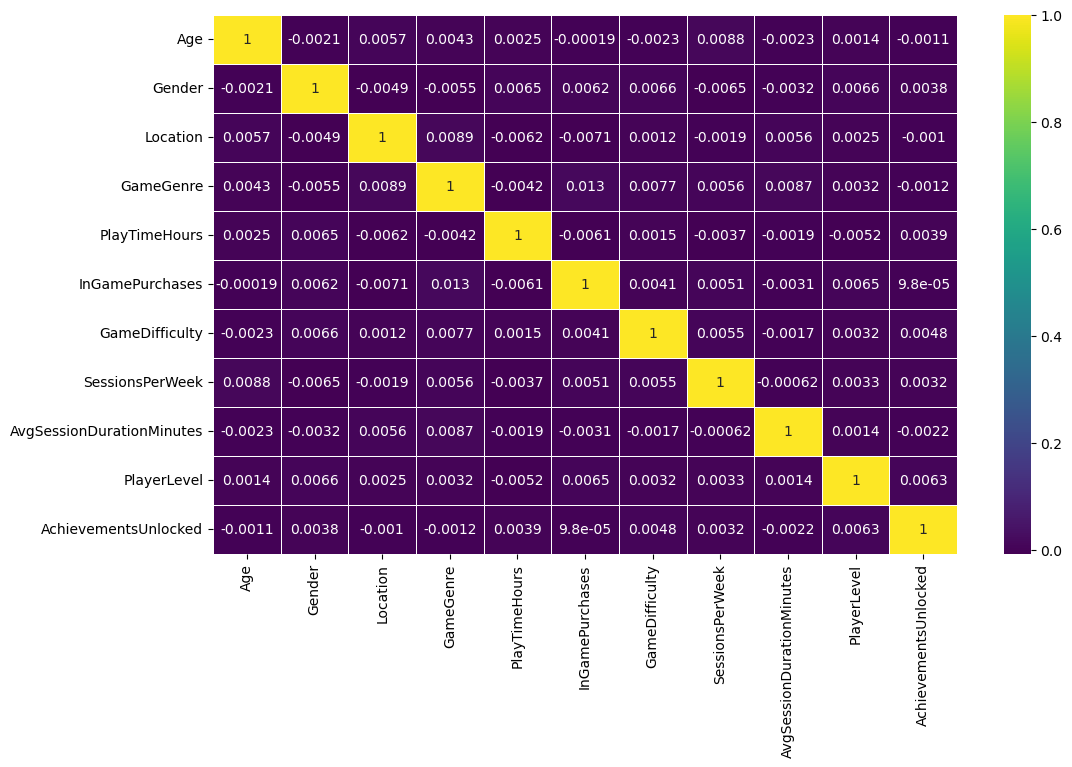

In [ ]:
# Heatmap for input features
plt.figure(figsize = (12,7))
corr_mat  = X.corr()
sns.heatmap(corr_mat, annot = True, cmap = 'viridis', linewidths = 0.5)
plt.show()

In [ ]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =  25)


In [ ]:
# Apply Standard Scaling

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
models = [GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(max_depth = 3), RandomForestClassifier()]

In [ ]:
def model_function(model, X_train_sc, X_test_sc, y_train, y_test):
    print(f'Results for {model}')
    print('------------------------------')
    model.fit(X_train_sc, y_train)
    y_pred =  model.predict(X_test_sc)
    y_pred_prob = model.predict_proba(X_test_sc)
    # Determine the Class Order
    class_order =  model.classes_
    print(f'Class Order {class_order}')
    results_df =  pd.DataFrame({
        'Actual Label': y_test,
        'Predicted Label': y_pred
    })
    for i, class_name in enumerate(class_order):
        results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_prob[:, i], 2)
    training_accuracy =  accuracy_score(y_train, model.predict(X_train_sc))
    testing_accuracy = accuracy_score(y_test, y_pred)
    print(f'Training Accuracy {training_accuracy:.3f}')
    print(f'Testing {testing_accuracy:.3f}')
    conf_mat = confusion_matrix(y_test, y_pred)
    cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = class_order )
    cm_display.plot(colorbar= False)
    plt.show()
    class_report =  classification_report(y_test, y_pred)
    print(class_report)
    # plot ROC AUC Curve
    if len(set(y_test))>1:
        y_test_binarize = label_binarize(y_test, classes = class_order)
        n_classes =  y_test_binarize.shape[1]
        fpr = {}
        tpr = {}
        roc_auc ={}
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_pred_prob[:, i])
            roc_auc[i] = roc_auc_score(y_test_binarize[:, i], y_pred_prob[:, i])
        plt.figure()
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color = color, lw = 2, label = f'ROC Curve for class {i} (Area = {roc_auc[i]:.3f})')
        plt.plot([0,1], [0,1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model}')
        plt.legend()
        plt.show()
    else:
        print('ROC AUC Score is not defined as only one class is present')






Results for GaussianNB()
------------------------------
Class Order ['High' 'Low' 'Medium']
Training Accuracy 0.841
Testing 0.842


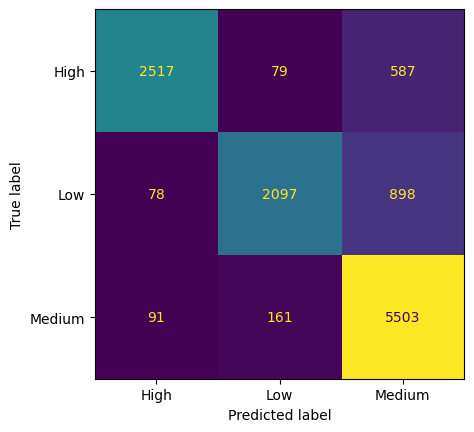

              precision    recall  f1-score   support

        High       0.94      0.79      0.86      3183
         Low       0.90      0.68      0.78      3073
      Medium       0.79      0.96      0.86      5755

    accuracy                           0.84     12011
   macro avg       0.87      0.81      0.83     12011
weighted avg       0.86      0.84      0.84     12011



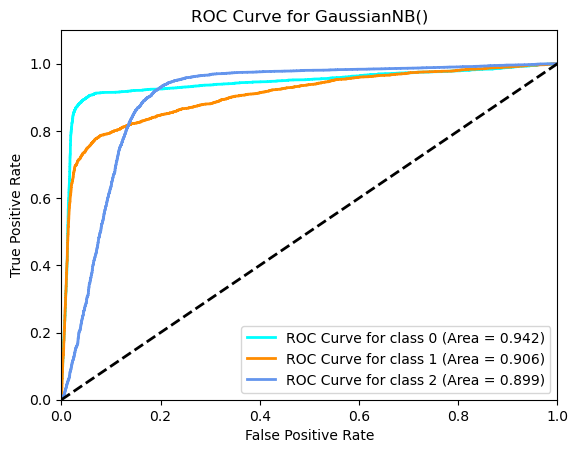

Results for KNeighborsClassifier()
------------------------------
Class Order ['High' 'Low' 'Medium']
Training Accuracy 0.844
Testing 0.759


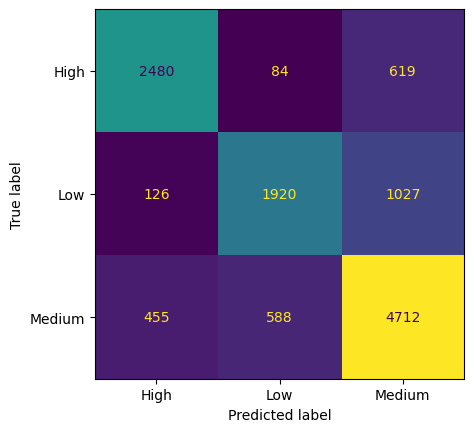

              precision    recall  f1-score   support

        High       0.81      0.78      0.79      3183
         Low       0.74      0.62      0.68      3073
      Medium       0.74      0.82      0.78      5755

    accuracy                           0.76     12011
   macro avg       0.76      0.74      0.75     12011
weighted avg       0.76      0.76      0.76     12011



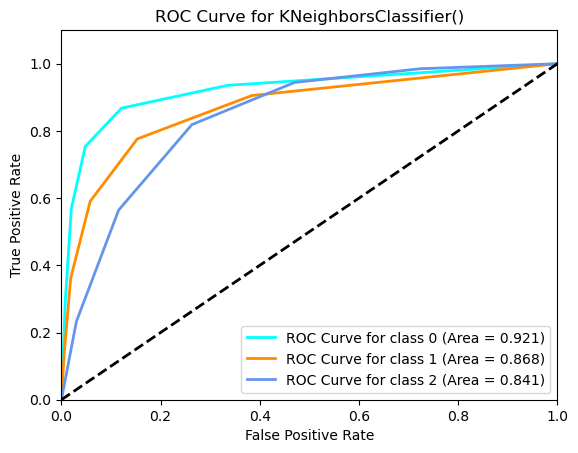

Results for DecisionTreeClassifier(max_depth=3)
------------------------------
Class Order ['High' 'Low' 'Medium']
Training Accuracy 0.801
Testing 0.802


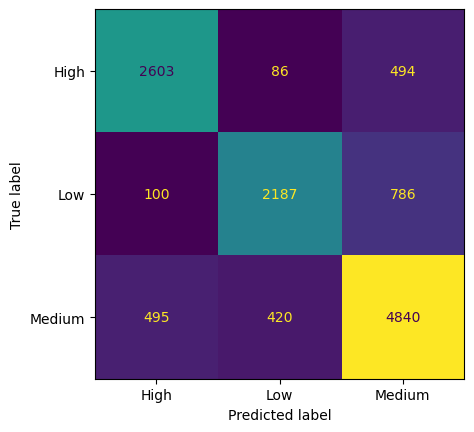

              precision    recall  f1-score   support

        High       0.81      0.82      0.82      3183
         Low       0.81      0.71      0.76      3073
      Medium       0.79      0.84      0.82      5755

    accuracy                           0.80     12011
   macro avg       0.81      0.79      0.80     12011
weighted avg       0.80      0.80      0.80     12011



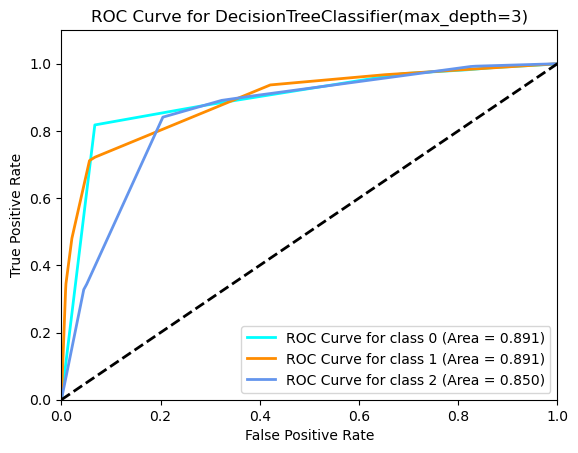

Results for RandomForestClassifier()
------------------------------
Class Order ['High' 'Low' 'Medium']
Training Accuracy 1.000
Testing 0.909


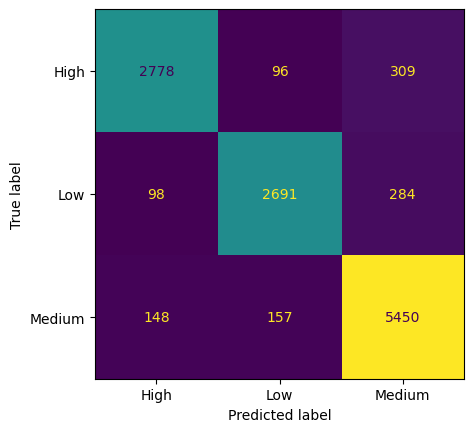

              precision    recall  f1-score   support

        High       0.92      0.87      0.90      3183
         Low       0.91      0.88      0.89      3073
      Medium       0.90      0.95      0.92      5755

    accuracy                           0.91     12011
   macro avg       0.91      0.90      0.90     12011
weighted avg       0.91      0.91      0.91     12011



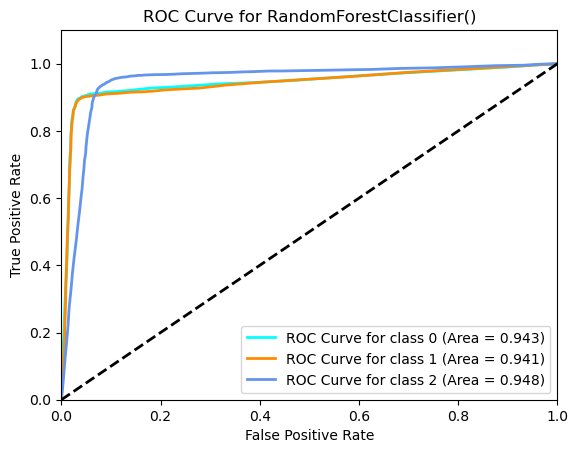

In [ ]:
for model in models:
    model_function(model, X_train, X_test, y_train, y_test)

# Multi Label Classification
it allows us to classify datasets with more than 1 target variable. one input may belong to more than one categories.
Examples:
- Text Categorization
- Image Taggging
- Medical Diagnosis
- Music/Video Genre Classification

In [ ]:
pd.get_dummies(y_test, dtype = 'int').values.shape[1]

3